# Dimensionality Reduction

Dimentionality reduction using *principal component analysis' on Abalone(sea weed) dataset

07/12/2018

In [15]:
#

In [16]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [17]:
# Loading dataseta
df = pd.read_csv('~/techtra/abalone.csv', header= -1)

cols = ['Sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
df.columns = cols

pd.DataFrame(df)

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [18]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex        4177 non-null object
Length     4177 non-null float64
Diam       4177 non-null float64
Height     4177 non-null float64
Whole      4177 non-null float64
Shucked    4177 non-null float64
Viscera    4177 non-null float64
Shell      4177 non-null float64
Rings      4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [20]:
df.isnull().sum()

Sex        0
Length     0
Diam       0
Height     0
Whole      0
Shucked    0
Viscera    0
Shell      0
Rings      0
dtype: int64

In [21]:
X = df.iloc[:,1:]

In [31]:
# PCA
pca = PCA(n_components = None)
X_sc = sc.fit_transform(X)
pca.fit(X_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.explained_variance_ratio_

array([8.39054894e-01, 8.69516209e-02, 3.23053901e-02, 2.07487304e-02,
       1.06187080e-02, 7.93409586e-03, 1.58677048e-03, 7.99790556e-04])

In [39]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.839 0.087 0.032 0.021 0.011 0.008 0.002 0.001]


In [42]:
# Taking the cumulative sum of variance distribution
print(np.cumsum(pca.explained_variance_ratio_))

[0.83905489 0.92600651 0.9583119  0.97906064 0.98967934 0.99761344
 0.99920021 1.        ]


Text(0,0.5,'Cumulative Variance explained')

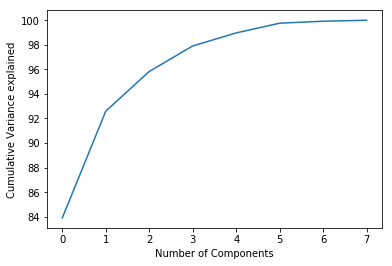

In [44]:
# Plotting
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance explained')